# **AlexNet Architecture**

# **1. Import libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization

# **2. This dataset below has eight types of Micro Organism.**

['Euglena', 'Hydra', 'Rod_bacteria', 'Yeast', 'Spiral_bacteria', 'Paramecium', 'Spherical_bacteria', 'Amoeba']

In [3]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_path = os.listdir('/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism/')

In [5]:
Micro_Organism_types = os.listdir('/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism/')
print (Micro_Organism_types)  

print("Types of Micro_Organism found: ", len(dataset_path))

['Euglena', 'Hydra', 'Rod_bacteria', 'Yeast', 'Spiral_bacteria', 'Paramecium', 'Spherical_bacteria', 'Amoeba']
Types of Micro_Organism found:  8


#**3. We obtain all the file names in the first for loop, and in the second loo, we add them to the empty list of Micro Organism.**

In [6]:
Micro_Organism = []

for item in Micro_Organism_types:
  all_types = os.listdir('/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism/' + '/' +item) 
  
  for part in all_types:
    Micro_Organism.append((item, str('/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism/' + '/' +item) + '/' + part))  

Micro_Organism

[('Euglena',
  '/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism//Euglena/Image_2.jpg'),
 ('Euglena',
  '/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism//Euglena/Image_74.jpg'),
 ('Euglena',
  '/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism//Euglena/Image_44.jpg'),
 ('Euglena',
  '/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism//Euglena/Image_59.jpg'),
 ('Euglena',
  '/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism//Euglena/Image_72.jpg'),
 ('Euglena',
  '/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism//Euglena/Image_164.jpg'),
 ('Euglena',
  '/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism//Euglena/Image_169.jpg'),
 ('Euglena',
  '/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism//Euglena/Image_94.jpg'),
 ('Euglena',
  

#**4. We construct our DataFrame.**

In [7]:
import pandas as pd 

In [8]:
Micro_Organism_df = pd.DataFrame(data = Micro_Organism, columns=['Micro_Organism type', 'image'])
print(Micro_Organism_df.head())
print(Micro_Organism_df.tail())

  Micro_Organism type                                              image
0             Euglena  /content/drive/MyDrive/Mohammad Mahdi Khojaste...
1             Euglena  /content/drive/MyDrive/Mohammad Mahdi Khojaste...
2             Euglena  /content/drive/MyDrive/Mohammad Mahdi Khojaste...
3             Euglena  /content/drive/MyDrive/Mohammad Mahdi Khojaste...
4             Euglena  /content/drive/MyDrive/Mohammad Mahdi Khojaste...
    Micro_Organism type                                              image
475              Amoeba  /content/drive/MyDrive/Mohammad Mahdi Khojaste...
476              Amoeba  /content/drive/MyDrive/Mohammad Mahdi Khojaste...
477              Amoeba  /content/drive/MyDrive/Mohammad Mahdi Khojaste...
478              Amoeba  /content/drive/MyDrive/Mohammad Mahdi Khojaste...
479              Amoeba  /content/drive/MyDrive/Mohammad Mahdi Khojaste...


# **5. We check our observations in each class.**

In [9]:
print("Total number of Micro_Organism in the dataset: ", len(Micro_Organism_df))

Micro_Organism_count = Micro_Organism_df['Micro_Organism type'].value_counts()

print("Micro_Organism in each category: ")
print(Micro_Organism_count)

Total number of Micro_Organism in the dataset:  480
Micro_Organism in each category: 
Euglena               60
Hydra                 60
Rod_bacteria          60
Yeast                 60
Spiral_bacteria       60
Paramecium            60
Spherical_bacteria    60
Amoeba                60
Name: Micro_Organism type, dtype: int64


# **6. We loop over all the eight folders and obtain the name of all the images. Then we resize our images and append the images to the images = [] list and labels to the labels [] list.**

In [10]:
import cv2

In [11]:
path = '/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism/'


im_size = 227

images = []
labels = []

for i in Micro_Organism_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:    
      img = cv2.imread(data_path + '/' + f)  
        
      img = cv2.resize(img, (im_size, im_size))
      #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      images.append(img)
      labels.append(i)

labels   

['Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Euglena',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',
 'Hydra',


# **7. We transform the image into a numpy array.**

In [12]:
images = np.array(images)
images.shape

(480, 227, 227, 3)

#**8. We perform scaling on our images.** 

In [13]:
images = images.astype('float32') / 255.0

#**9. We perform LabelEncoding and OneHotencoding.**

In [14]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=Micro_Organism_df['Micro_Organism type'].values


y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)


y=y.reshape(-1,1)
onehotencoder=OneHotEncoder(categories='auto', sparse=False)

Y= onehotencoder.fit_transform(y)
Y.shape  

(480, 8)

# **10. We do train-test-split**

In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

n_classes = 8

images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.20, random_state=42)

In [16]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(384, 227, 227, 3)
(384, 8)
(96, 227, 227, 3)
(96, 8)


# **11. Design our convolutional neural network architecture**

https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98

In [17]:
model = Sequential([

    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    layers.BatchNormalization(),    
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),    
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),


    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),              
                  
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),


    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(n_classes, activation='softmax'),

])

# **12. We obtain our model summary (AlexNet)**

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

# **13. Model compile**

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# **14. We Train our model**

In [20]:
history = model.fit(train_x, train_y, epochs = 60, batch_size = 32, verbose = 1, validation_data=(test_x, test_y))

Epoch 1/60
12/12 [==============================] - 63s 5s/step - loss: 8.6132 - accuracy: 0.1276 - val_loss: 7.9675 - val_accuracy: 0.0729
Epoch 2/60
12/12 [==============================] - 58s 5s/step - loss: 3.4781 - accuracy: 0.2344 - val_loss: 6.8725 - val_accuracy: 0.1042
Epoch 3/60
12/12 [==============================] - 57s 5s/step - loss: 3.3047 - accuracy: 0.2031 - val_loss: 5.1819 - val_accuracy: 0.0938
Epoch 4/60
12/12 [==============================] - 61s 5s/step - loss: 2.7911 - accuracy: 0.2500 - val_loss: 2.7973 - val_accuracy: 0.1042
Epoch 5/60
12/12 [==============================] - 58s 5s/step - loss: 2.7726 - accuracy: 0.2552 - val_loss: 2.2249 - val_accuracy: 0.1562
Epoch 6/60
12/12 [==============================] - 58s 5s/step - loss: 2.5662 - accuracy: 0.2891 - val_loss: 2.2821 - val_accuracy: 0.2292
Epoch 7/60
12/12 [==============================] - 58s 5s/step - loss: 2.1147 - accuracy: 0.3281 - val_loss: 2.2102 - val_accuracy: 0.1875
Epoch 8/60
12/12 [==

# **15. Visualize training results**

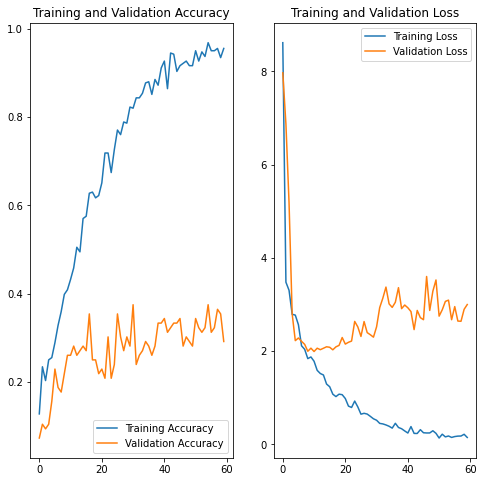

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(60)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **16. We evaluate the model on our test data**

In [22]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

3/3 [==============================] - 3s 1s/step - loss: 2.9992 - accuracy: 0.2917
Loss = 2.9991579055786133
Test Accuracy = 0.2916666567325592


# **17. Data augmentation**

https://www.tensorflow.org/tutorials/images/data_augmentation#data_augmentation_2

In [32]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(227,
                                  227,
                                  3)),
    layers.RandomRotation(0.8),
    layers.RandomZoom(0.1),
  ]
)

# **18. Design our convolutional neural network architecture + add some changes!**

In [33]:
model = Sequential([
    
    data_augmentation, 

    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    layers.BatchNormalization(),    
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),    
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),


    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),              
                  
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),


    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(n_classes, activation='softmax'),

])

# **19. We obtain our model summary (AlexNet)**

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 227, 227, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_10 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_11 (Bat  (None, 27, 27, 256)     

# **20. Model compile**

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# **21. We Train our model**

In [36]:
history = model.fit(train_x, train_y, epochs = 90, batch_size = 32, verbose = 1, validation_data=(test_x, test_y))

Epoch 1/90
12/12 [==============================] - 70s 6s/step - loss: 31.6258 - accuracy: 0.1745 - val_loss: 635.7723 - val_accuracy: 0.1042
Epoch 2/90
12/12 [==============================] - 66s 6s/step - loss: 16.2976 - accuracy: 0.1771 - val_loss: 82.5796 - val_accuracy: 0.1042
Epoch 3/90
12/12 [==============================] - 70s 6s/step - loss: 6.9191 - accuracy: 0.1797 - val_loss: 30.7938 - val_accuracy: 0.0938
Epoch 4/90
12/12 [==============================] - 65s 5s/step - loss: 5.4087 - accuracy: 0.1250 - val_loss: 11.2932 - val_accuracy: 0.1146
Epoch 5/90
12/12 [==============================] - 66s 6s/step - loss: 4.6143 - accuracy: 0.2005 - val_loss: 23.6099 - val_accuracy: 0.1042
Epoch 6/90
12/12 [==============================] - 70s 6s/step - loss: 3.6220 - accuracy: 0.1745 - val_loss: 10.5813 - val_accuracy: 0.1042
Epoch 7/90
12/12 [==============================] - 66s 6s/step - loss: 3.5081 - accuracy: 0.2109 - val_loss: 10.9644 - val_accuracy: 0.0938
Epoch 8/90

# **22. Visualize training results**

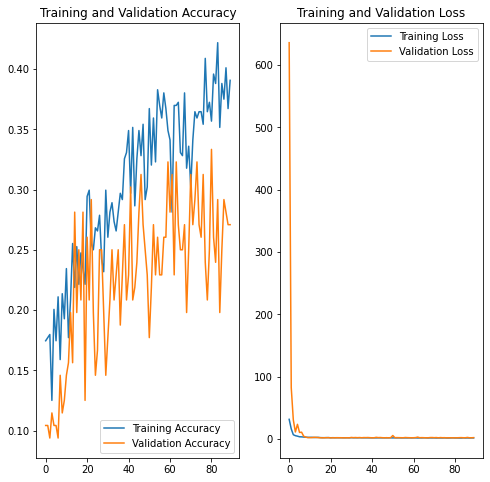

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(90)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **23. We evaluate the model on our test data**

In [38]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

3/3 [==============================] - 4s 1s/step - loss: 2.2557 - accuracy: 0.2708
Loss = 2.2556912899017334
Test Accuracy = 0.2708333432674408


# **24. confusion matrix**

https://subscription.packtpub.com/book/data/9781838646301/8/ch08lvl1sec38/confusion-matrix

In [39]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred, axis=1)
test_y=np.argmax(test_y, axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred)
confusion_matrix

3/3 [==============================] - 7s 2s/step


array([[ 3,  2,  5,  0,  1,  1,  0,  0],
       [ 0, 12,  0,  0,  0,  1,  0,  0],
       [ 2,  0,  8,  0,  0,  0,  0,  0],
       [ 0,  3,  5,  0,  0,  0,  1,  0],
       [ 3,  1,  1,  0,  0,  2,  0,  0],
       [ 4,  3,  3,  2,  0,  1,  0,  0],
       [ 3,  2,  7,  0,  1,  2,  1,  0],
       [ 6,  2,  6,  0,  0,  0,  1,  1]])

# **25. classification report**

In [40]:
target_names = ['Euglena', 'Hydra', 'Rod_bacteria', 'Yeast', 'Spiral_bacteria', 'Paramecium', 'Spherical_bacteria', 'Amoeba']

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [41]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

           Euglena       0.14      0.25      0.18        12
             Hydra       0.48      0.92      0.63        13
      Rod_bacteria       0.23      0.80      0.36        10
             Yeast       0.00      0.00      0.00         9
   Spiral_bacteria       0.00      0.00      0.00         7
        Paramecium       0.14      0.08      0.10        13
Spherical_bacteria       0.33      0.06      0.11        16
            Amoeba       1.00      0.06      0.12        16

          accuracy                           0.27        96
         macro avg       0.29      0.27      0.19        96
      weighted avg       0.35      0.27      0.20        96



# **26. plot confusion matrix**

<Figure size 432x288 with 0 Axes>

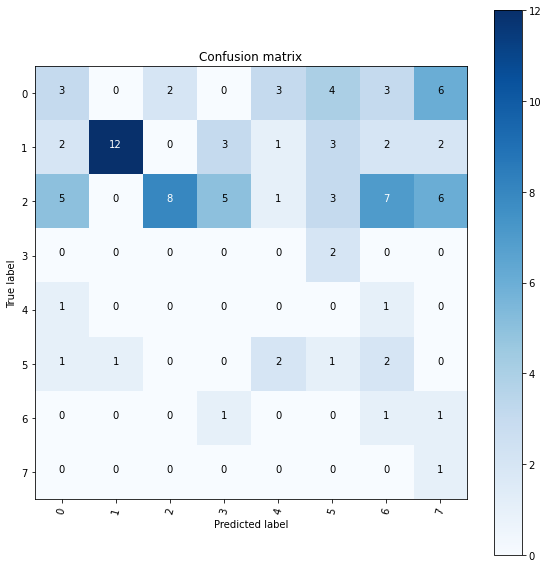

In [42]:
# Confussion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(8)
cm = confusion_matrix(y_pred,test_y)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

# **====================================================================**